In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv("/content/1.5wt.csv", header = None)

In [ ]:
df1.columns

Int64Index([0, 1], dtype='int64')

In [ ]:
df1=df1.iloc[:801,1:]

In [ ]:
df1

,1
0,64.3482
1,64.3482
2,64.3482
3,64.3482
4,64.3482
...,...
796,46.8885
797,47.0948
798,47.2502
799,47.2593


In [ ]:
import matplotlib.pyplot as plt


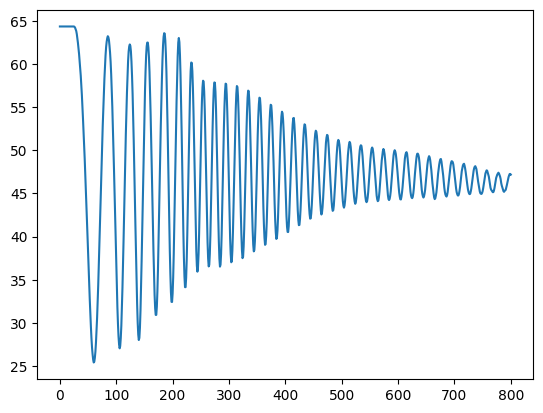

In [ ]:
fig, ax=plt.subplots()
ax.plot(df1)

In [ ]:
df1.columns = ['values']
df1

,values
0,64.3482
1,64.3482
2,64.3482
3,64.3482
4,64.3482
...,...
796,46.8885
797,47.0948
798,47.2502
799,47.2593


In [ ]:
from scipy.signal import argrelextrema


In [ ]:
df1=np.array(df1['values'])


In [ ]:
# Find local maxima using argrelextrema
max_index1 = np.array(argrelextrema(df1, np.greater))

print(max_index1)

[[ 85 124 155 185 211 233 254 274 294 314 334 354 374 394 415 434 454 474
  494 514 534 554 574 594 615 635 655 676 695 717 737 757 778 799]]


In [ ]:
# Find local maxima using argrelextrema
min_index = np.array(argrelextrema(df1, np.less))
min_index = min_index[:,1:]
print(min_index)

[[106 140 170 199 222 244 264 284 304 324 344 364 384 405 424 444 464 484
  504 524 544 564 584 605 625 645 665 686 706 727 748 768 788]]


In [ ]:
min_index.shape

(1, 33)

In [ ]:
print(max_index1.shape)
print(min_index.shape)

(1, 34)
(1, 33)


In [ ]:
arr_x = []
for x in range(df1.size):
  arr_x.append(x)

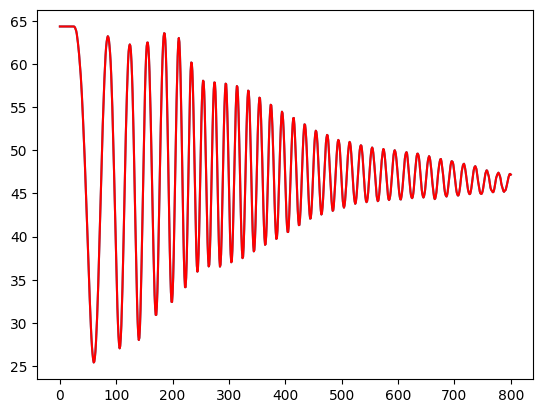

In [ ]:
from scipy.signal import savgol_filter
x = np.array(arr_x)
y = df1
yhat = savgol_filter(y, 5, 4) # window size 5, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [ ]:
# Find local maxima using argrelextrema
max_index1 = np.array(argrelextrema(yhat, np.greater))
print(max_index1.shape)
print(max_index1)
print(df1[max_index1])

# Find local maxima using argrelextrema
min_index1 = np.array(argrelextrema(yhat, np.less))
min_index1 = min_index1[:,1:]
print(min_index1.shape)
print(min_index1)
print(df1[min_index1])

(1, 34)
[[ 85 124 155 185 211 233 254 274 294 314 334 354 374 394 415 434 454 474
  494 514 534 554 574 594 615 635 655 676 695 717 737 757 778 799]]
[[63.2206 62.2675 62.4825 63.5692 63.0128 60.1711 58.0645 57.8606 57.7209
  57.4476 56.9138 56.0977 55.2757 54.4729 53.7471 53.0088 52.2696 51.7823
  51.2031 50.9741 50.5815 50.3224 50.153  50.0084 49.7831 49.6106 49.3192
  48.993  48.7383 48.438  48.1582 47.6743 47.4034 47.2593]]
(1, 34)
[[ 60 106 140 170 199 222 244 264 284 304 324 344 364 384 405 424 444 464
  484 504 524 544 564 584 605 625 645 665 686 706 727 748 768 788]]
[[25.4125 27.0503 28.0114 30.9221 32.4202 34.1353 35.9366 36.5413 36.5171
  37.0224 37.5007 38.2856 39.0443 39.7287 40.5267 41.3248 42.0797 42.5588
  42.9848 43.3536 43.7996 43.9912 44.1074 44.2355 44.2992 44.4557 44.5271
  44.3458 44.6408 44.7664 44.9179 44.9445 45.1468 45.1882]]


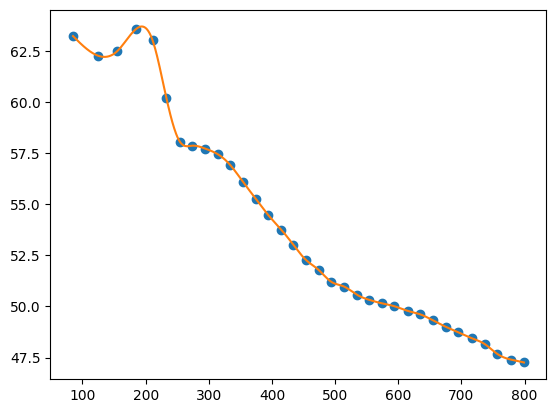

In [ ]:
from scipy.interpolate import interp1d
x = max_index1[0]
y = df1[max_index1][0]

x_interp = np.linspace(np.min(max_index1), np.max(max_index1), (np.max(max_index1)-np.min(max_index1)))

y_cubic = interp1d(x,y, kind="cubic")

plt.plot(x,y,'o')
plt.plot(x_interp, y_cubic(x_interp))

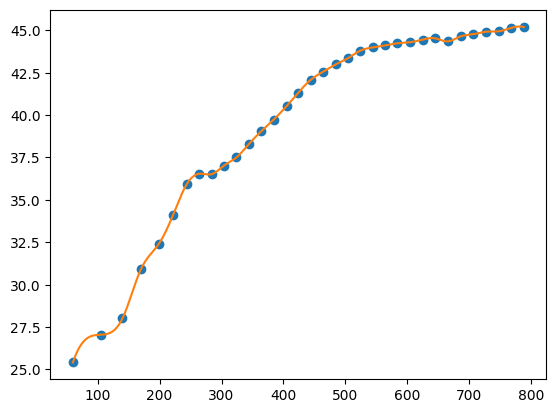

In [ ]:
from scipy.interpolate import interp1d
x1 = min_index1[0]
y1 = df1[min_index1][0]
x_interp1 = np.linspace(np.min(min_index1), np.max(min_index1), (np.max(min_index1)-np.min(min_index1)))
y_cubic1 = interp1d(x1,y1, kind="cubic")

plt.plot(x1,y1,'o')
plt.plot(x_interp1, y_cubic1(x_interp1))

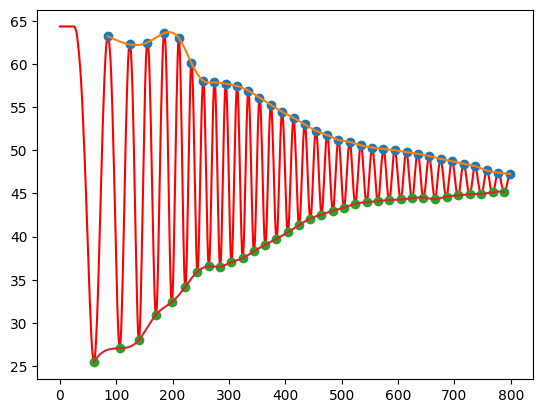

In [ ]:
from scipy.interpolate import interp1d

x = max_index1[0,0:]
y = df1[max_index1][0,0:]
x_interp = np.linspace(np.min(max_index1[0,0:]), np.max(max_index1[0,0:]), (np.max(max_index1[0,0:])-np.min(max_index1[0,0:])))
y_cubic = interp1d(x,y, kind="cubic")

x1 = min_index1[0]
y1 = df1[min_index1][0]
x_interp1 = np.linspace(np.min(min_index1), np.max(min_index1), (np.max(min_index1)-np.min(min_index1)))
y_cubic1 = interp1d(x1,y1, kind="cubic")

_ = plt.plot(arr_x, yhat, 'red')


plt.plot(x,y,'o')
plt.plot(x_interp, y_cubic(x_interp))
plt.plot(x1,y1,'o')
plt.plot(x_interp1, y_cubic1(x_interp1))
plt.show()

In [ ]:
np.argmin(min_index1)

0

In [ ]:
df1[min_index1][0,0]

25.4125

In [ ]:
g_min = np.zeros(df1.size)
for i in range (0, 60):
  g_min[i] = df1[min_index1][0,0]


In [ ]:
g_min = np.concatenate((g_min, y_cubic1(x_interp1)), axis=None)


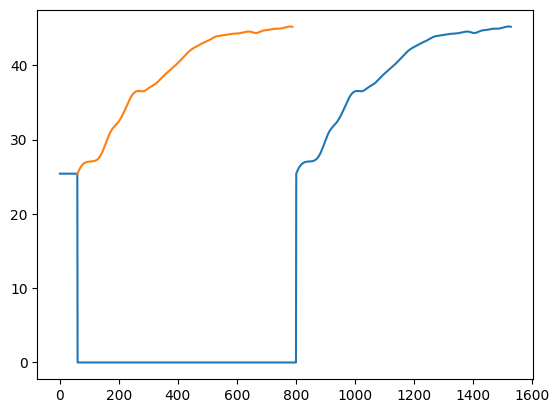

In [ ]:
plt.plot(g_min, '-')

plt.plot(x_interp1, y_cubic1(x_interp1))
plt.show()


In [ ]:
max_index[0][0]

85

In [ ]:
max_index[0,1]

124

In [ ]:
g_max = np.zeros(max_index[0][0])
for i in range (0, max_index[0][0]):
  g_max[i] = df1[max_index][0,0]

In [ ]:
g_max = np.concatenate((g_max, y_cubic(x_interp)), axis=None)

In [ ]:
_ = plt.plot(g_max, '-')
plt.plot(x,y,'o')
plt.plot(x_interp, y_cubic(x_interp))
plt.show()

In [ ]:
g_max = np.zeros(max_index[0][0])

In [ ]:
for i in range(0,26):
  g_max[i]=65

In [ ]:
y_cubic(x_interp)[0]

63.2206

In [ ]:
for i in range(25, max_index[0][0]):
  g_max[i] = (g_max[25] - y_cubic(x_interp)[0]) * (i - max_index[0][0])/(25-max_index[0][0]) +y_cubic(x_interp)[0]

In [ ]:
g_max[25] - y_cubic(x_interp)[0]

1.7794000000000025

In [ ]:
g_max1 = np.concatenate((g_max, y_cubic(x_interp)), axis=None)

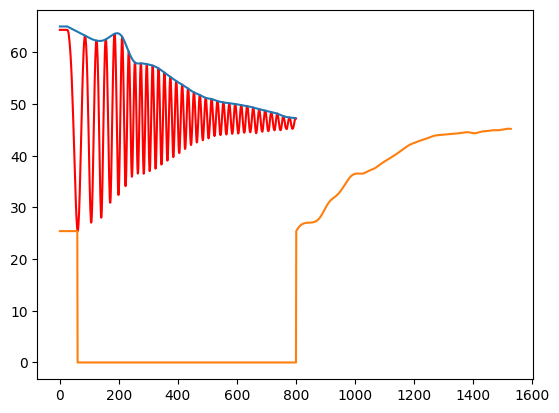

In [ ]:
plt.plot(arr_x, yhat, 'red')
plt.plot(g_max1, '-')
plt.plot(g_min, '-')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.columns

In [ ]:
df = df.iloc[:,1:]


In [ ]:
df = np.array(df)

In [ ]:
df.shape

In [ ]:
fig, ax=plt.subplots()
ax.plot(df)

In [ ]:
slope = np.empty(520)
#diff2 = np.empty(520)
k = np.empty(520)


In [ ]:
for i in range(1, df.size-1):
  tx = [i-1,i,i+1]
  ty = [df[i-1],df[i],df[i+1]]
  coeff = np.polyfit(tx,ty,3)
  diff1 = 3*coeff[0]*i**2 + 2*coeff[1]*i+coeff[2]
  diff2=6*coeff[0]*i + 2*coeff[1]
  slope[i-1]=diff1

  k[i-1] = (diff2/(1+diff1**2))**1.5 + diff1/i*((1+diff1**2)**0.5)

plt.plot(slope)

plt.plot(k)


# Create a polynomial function using the coefficients
# poly_func = np.poly1d(coeff)

# # Generate x values for plotting the fitted curve
# x_fit = np.linspace(min(tx), max(tx), 100)

# # Evaluate the polynomial function for the fitted curve
# y_fit = poly_func(x_fit)

# # Plot the original data points and the fitted curve
# plt.scatter(tx, ty, label='Data Points')
# plt.plot(x_fit, y_fit, label=f'Fitted Curve (Degree {3})', color='red')
# plt.legend()
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Polynomial Curve Fitting')
# plt.show()


In [ ]:
diff1

In [ ]:
coeff

In [ ]:
from scipy.signal import argrelextrema


In [ ]:
df.columns = ['values']
df

In [ ]:
df=np.array(df['values'])

In [ ]:
# Find local maxima using argrelextrema
max_index = np.array(argrelextrema(df, np.greater))

print(max_index)

In [ ]:
# Find local maxima using argrelextrema
min_index = np.array(argrelextrema(df, np.less))

print(min_index)

In [ ]:
print(max_index.shape)
print(min_index.shape)

In [ ]:
arr_x = []
for x in range(df.size):
  arr_x.append(x)

In [ ]:
type(arr_x)

In [ ]:
from scipy.signal import savgol_filter
x = np.array(arr_x)
y = df
yhat = savgol_filter(y, 10, 3) # window size 5, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [ ]:
type(yhat)

In [ ]:
# Find local maxima using argrelextrema
max_index1 = np.array(argrelextrema(yhat, np.greater))
print(max_index1)
print(df[max_index1])

# Find local maxima using argrelextrema
min_index1 = np.array(argrelextrema(yhat, np.less))
print(min_index1)
print(df[min_index1])

In [ ]:
print(max_index1.shape)
print(min_index1.shape)

In [ ]:
max_index1[0,0]

In [ ]:
df[max_index1[0,0]]

In [ ]:
from scipy.interpolate import interp1d
x = max_index1[0]
y = df[max_index1][0]

x_interp = np.linspace(np.min(max_index1), np.max(max_index1), (np.max(max_index1)-np.min(max_index1)))

y_cubic = interp1d(x,y, kind="cubic")

plt.plot(x,y,'o')
plt.plot(x_interp, y_cubic(x_interp))

In [ ]:
for i in range (max_index1[0,0]):
  yhat[i] = df[max_index1[0,0]]
print(yhat)

In [ ]:
x.shape

In [ ]:
yhat.shape

In [ ]:
df.shape

In [ ]:
fig, ax=plt.subplots()
ax.plot(x,yhat)
plt.grid()

In [ ]:
max_index1

In [ ]:
df[max_index1].shape

In [ ]:
import warnings
z_max = np.polyfit(max_index1[0], df[max_index1][0], 8)
print(z_max)

z_min = np.polyfit(min_index1[0], df[min_index1][0], 8)
print(z_min)

In [ ]:
p_max = np.poly1d(z_max)
p_min = np.poly1d(z_min)

In [ ]:
_ = plt.plot(arr_x, yhat, 'red', arr_x, p_max(arr_x), '-', arr_x, p_min(arr_x), '-')
plt.show()

In [ ]:
g_min = p_min(arr_x)
for i in range (0, 120):
  g_min[i] = p_min(arr_x)[120]

In [ ]:
_ = plt.plot(arr_x, yhat, 'red', arr_x, p_max(arr_x), '-', arr_x, g_min, '-')
plt.show()

In [ ]:
g_max = p_max(arr_x)
for i in range (0, 58):
  g_max[i] = 44

In [ ]:
_ = plt.plot(arr_x, yhat, 'red', arr_x, g_max, '-', arr_x, g_min, '-')
plt.show()

In [ ]:
xp = [58, 156]
fp = [44, yhat[156]]
for i in range (58, 156):
  g_max[i] = np.interp(i, xp, fp)

In [ ]:
_ = plt.plot(arr_x, yhat, 'red', arr_x, g_max, '-', arr_x, g_min, '-')
plt.show()

In [ ]:
G = np.zeros(df1.size)

In [ ]:
G.shape

In [ ]:
for i in range(0,df1.size):
  G[i] = (g_max1[i] - yhat[i])/(g_max1[i] - g_min[i])

In [ ]:
fig, ax = plt.subplots()
ax.plot(arr_x, G);


In [ ]:
nl=1.33
ns=3.88
nv=1  #ref index

In [ ]:
r1=(nl-nv)/(nl+nv)
r2=(ns-nl)/(ns+nl)

In [ ]:
a=r1*r1 + r2*r2
b=2*r1*r2
c=1+(r1*r2)*(r1*r2)

In [ ]:
RLmin=(a-b)/(c-b)
RLmax=(a+b)/(c+b)

In [ ]:
RL=G*(RLmax-RLmin)+RLmin

In [ ]:
fig, ax = plt.subplots()
ax.plot(arr_x, RL);

In [ ]:
cos_theta=(RL*c-a)/(b*(1-RL))

In [ ]:
fig, ax = plt.subplots()
ax.plot(arr_x, cos_theta);

In [ ]:
type(cos_theta)

In [ ]:
for i in range (cos_theta.size):
  if(cos_theta[i]>1):
    cos_theta[i]=1
  if(cos_theta[i]<-1):
    cos_theta[i]=-1

In [ ]:
fig, ax = plt.subplots()
ax.plot(arr_x, cos_theta);

In [ ]:
theta = np.arccos(cos_theta)

In [ ]:
fig, ax = plt.subplots()
ax.plot(arr_x, theta);

In [ ]:
t = np.zeros(theta.size)
t[0] = theta[0]
for i in range(theta.size-1):
  t[i+1] = t[i] + abs(theta[i+1] - theta[i])

In [ ]:
wlen=550

In [ ]:
delta = t*wlen/(4*(np.pi)*nl)

In [ ]:
d=0.1*np.array(arr_x)

In [ ]:
fig, ax = plt.subplots()
ax.plot(d, delta);

In [ ]:
from scipy.signal import savgol_filter
x = np.array(d)
y = delta
delta = savgol_filter(y, 20, 3) # window size 5, polynomial order 3

plt.plot(x,delta, color='red')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X2 = delta


In [ ]:
X2.shape


In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
# Transform the input data to include polynomial features
X_poly = poly.fit_transform(X2.reshape(-1, 1))  # Reshape X2 to be a column vector before transformation

# Now you can perform polynomial regression using the transformed features
# For example, using LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)  # Assuming y contains the target values corresponding to X2


In [ ]:
# Get the coefficients of the polynomial regression model
coefficients = model.coef_

# Get the intercept (if any)
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients) #a+bx+cx^2  [a,b,c]
print("Intercept:", intercept)

# Construct the polynomial function
def polynomial_function(x):
    # Initialize the predicted values based on the intercept
    y_pred = intercept

    # Multiply each coefficient with the corresponding power of x and add to y_pred
    for i in range(len(coefficients)):
        y_pred += coefficients[i] * (x ** i)

    return y_pred

# Example usage: Evaluating the polynomial function at some x value
x_value = 5
predicted_y = polynomial_function(x_value)
print("Predicted y for x =", x_value, ":", predicted_y)


In [ ]:
y = x*coefficients[1] + x*x*coefficients[2]